In [30]:
import finesse

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

# This notebook requires the following files
# nodal_network.svg, model_sketch.svg, fabry-perot02.svg, michelson_with_nodes.svg

# apply plotting styles
finesse.init_plotting()

# Interferometry for Graviational Waves  
A hands-on workshop at the <a href="https://www.supa.ac.uk/research/sussp73.php">73rd Scottish Universities Summer School in Physics</a>, Andreas Freise and Daniel Brown, 28.07.2017, adapted for Finesse 3.

This is the first notebook for the simulation workshop this week. The aim of the session is to introduce you to modelling gravitational wave detectors with the software <a href="http://www.gwoptics.org/finesse/">Finesse</a>. For a comprehensive overview of interferometry see our review article: <a href="https://link.springer.com/article/10.1007/s41114-016-0002-8">Interferometer Techniques for Gravitational-Wave Detection</a>. The schedule for today's session is as follows:
  * 09:15 to 09:30 welcome
  * 09:30 to 11:15 setup and simple examples
  * 11:45 to 12:45 preparation for main task 
  * 14:00 to 16:00 work on the main task 
  * 16:30 to 17:30 presentation (by you) of results

In this notebook we give a brief introduction to the software used today and construct first examples of interferometer models. All the material presented in the workshop are available at <a href="http://www.gwoptics.org/learn/schools/St_Andrews_2017/">http://www.gwoptics.org/learn/schools/St_Andrews_2017/</a>.

# Software

You should have received instructions on how to install Python, Pykat, Finesse and these notebook files already. If these did not install correctly we will find out today and can hopefully fix that.

We are going to use the <a href="https://www.python.org/">Python</a> programming language, executed in <a href="http://jupyter.org/">Jupyter</a> notebooks. Python is a powerful programming language which is particularly useful for fast development and scripting. We will use only a very small subset of Python's functionality. In particular, we will do simple mathematical operations (using the package <a href="http://www.numpy.org/">Numpy</a>), some simple string operations and we will plot output data.

Of course you can **not** learn Python today. Instead we expect to to play around with the provided examples and also to search the web for code to copy and paste. 

We will run the interferometer modelling software <a href="http://www.gwoptics.org/finesse">Finesse</a> which is developed for the design and commissioning of laser-interferometric gravitational wave detectors. It is optimised for modelling the main interferometers of LIGO, Virgo, GEO etc, but it is also a simple and versatile tool to learn basic laser optics. In addition we use <a href="http://www.gwoptics.org/pykat">PyKat</a>, a Python wrapper to **run Finesse** from Jupyter notebooks. The main advantage of using Finesse in this way is that Python offers the ability to do post-processing of the Finesse output very easily in the notebook. 

See below, at the end of the notebook, for links to more information about Python, Jupyter, Finesse and Pykat.


# Setting up a model and simulation
## Model = a network of components

In the most simple case we can think of the model as a set of ** optical components ** connected to each other via ** nodes **. The nodes are virtual connection points between the components, they have a unique name and store which components they are connected to. This allows to analyse the interferometer structure by traversing the list of existing nodes. Such a system is also called a ** nodal network **. For example, a system of two mirrors seperated by a distance would be modelled as three components and four nodes:

<div style="background-color:white; padding: 1em; text-align:center"><img src="nodal_network.svg" width=90% /></div>

The 'space' is also an optical component because the free propagation changes the phase of the light beam, and anything that changes a property of the light field is treated as a component by definition.

## Simulation = making a plot

Very many simulation tasks can be though of as making a plot: we look at an interferometer output signal when varying an interferometer parameter, such as, for example, a mirror position. An interferometer can have many output signals, most of which are the signals of photo detectors. Thus in Finesse a typical simulation task is defined by:
  1. creating the optical model by specifying the components
  2. adding the desired detectors to create output signals
  3. varying a parameter (using the xaxis command, see below)

# A First Model

Let's construct a simple Finesse model of a laser beam shining on a beamsplitter. In this simulation we just vary the input laser power and see how much light is transmitted through the beamsplitter. To measure the laser power we connect a photodiode to the correct node at the beamsplitter.

The sketch below shows the setup as a nodal network and also, for comparison, in a more common style.

<div style="background-color:white; padding:1em; text-align:center;">
<img src="model_sketch.svg" width="90%" />
</div>

The Finesse and Pykat code for this setup looks as follows:

In [7]:
# create a Finesse model
kat = finesse.Model()

# the code describing the optical model and the basic task
code = """
# setup of the interferometer, each line is one component
l laser1                    # laser with P = 1W at the default frequency
s s1 laser1.p1 bs1.p1 L=1   # 1m space connecting the laser to something
bs bs1                      # 50:50 beam splitter
pd pow_t bs1.p3.o           # photodiode detecting the transmitted light

# setup of the simulation task, each line is one command
# change the laser power from 0 to 1W in 10 steps
xaxis(laser1.P, lin, 0, 1, 10)
"""

# parsing the code and creating the model
kat.parse(code)

# running the simulation
out1 = kat.run()

The output data can be plotted in multiple ways. If you want to see the results quickly we suggest using the built-in plotting command for the output:

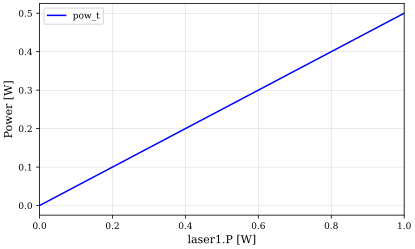

In [8]:
# plotting the results of an output can be done using the built-in command
fig = out1.plot()

This will produce a plot using all the detectors enabled in the model. It should be noted that the yaxis units are arbitrary [au] because multiple quantities can be shown at the same time. For example, a beam's power in Watts can be plotted along with the size of a beam in meters. Thus to infer the units of a trace you must check what type of detector has been used.

The built-in plotting function has many options that can be set to customise the plot. For more examples on using this, please see the dedicated notebook on <a href="http://www.gwoptics.org/learn/05_Tips_and_Examples/01_Plotting/01_Plotting_examples.html" target="_blank">plotting</a>.

However, if you would rather make a plot yourself you can always just use matplotlib commands as per usual:

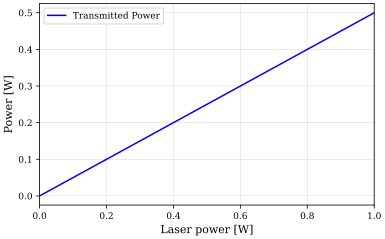

In [11]:
fig = plt.figure()
plt.plot(out1.x1, out1["pow_t"], label="Transmitted Power")
plt.xlim(out1.x1.min(), out1.x1.max())
plt.ylabel("Power [W]")
plt.xlabel("Laser power [W]")
plt.legend();

The `out` object returned by the `run()` command is important as it contains all the results from the simulation as an array of numbers: the number of steps in the simulation is set with the `xaxis` command and represents the number of rows, with each colum holding the values of a detector, and one column storing the values of the xaxis.

You can see the raw outputs with:

In [27]:
print(out1.x) # show the xaxis values
print(out1.y)
print(type(out1))

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),)
None
<class 'finesse.solutions.array.ArraySolution'>


As you can see, they are quite long and not easily readable. Here we just have one detector, however, if we have more we would have more columns of data. To find out which column is which you need to look at the `out.ylabels` array:

In [28]:
print(out1.outputs)

('pow_t',)


The recommended method for accessing the values of a particular detector is by using the detector's name as shown here:

In [29]:
out1["pow_t"]

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])

# Your Tasks

The following sections provide some simple tasks to get you up and running with Finesse and Pykat. The aim here is not to full understand the simulations but to just get something running. We hope that you can complete tasks 1 to 3 in one hour. Task 4 is an optional task for the faster students.

You should **help each other**, **work in groups**, organise yourselves and don't forget to ask for help when needed!

## Task 1: Check for power conservation

Copy the example simulation from above ('A First Model'), and do the following:
  1. Add `kat.noxaxis = True` (outside the model code), this tells Finesse to compute just one data point for our model and not change any parameters.
  2. Add a second photo detector 'pow_r' to the model code to measure the reflected light.
  3. Run this kat object to get the simulation output.
  4. Check if the reflected and transmitted power match up with the input power

## Task 2: Add interferometer arms

Copy the example simulation from above ('A First Model'), and do the following:
  1. Turn the setup into a Michelson interferometer by adding a space and a mirror to the transmitted and reflection port of the beam splitter (node n3 and n4)
  2. Set the length of the spaces to 3km and the mirror parameters of ETMx and ETMy to be R=1, T=0
  3. remove the old xaxis command and replace it with this  
  `xaxis ETMx phi lin 0 180 200`  
  This will scan the mirror position (tuning) from 0 to 180 degrees in 200 steps. The microscopic tuning is given in degrees with $360$ deg being equivalent to one wavelength $\lambda$, see the end of the notebook below for more information on that.
  3. Run this kat object and plot the simulation output.
 
<div style="background-color:white; padding:1em; text-align:center;">
<img src="michelson_with_nodes.svg" width="90%" />
</div>

## Task 3: Investigate optical losees

Copy the simulation you created in task 2 and do the following:
  1. Reproduce simulation output for the normal Michelson from task 1, save the output object.
  2. Add losses to ETMx (by setting R and T such that $R+T<1$, for example you can set the reflectivity to 70% with:  
  `kat.ETMx.R=0.7`
  3. Produce the output again for this new setup.
  4. Plot the results from both simultions in the same plot.

## Task 4: Make a cavity

Optical cavities are based on the the original idea for a spectroscopy standard published by Fabry and Perot in 1899. Cavities are a fundamental building block of current gravitational wave detectors and an important instrument in laser optics. 

<div style="background-color:white; padding:1em; text-align:center;">
<img src="fabry-perot02.svg" width="90%" />
</div>

This is a sketch of the setup that we want to model. It consists of two mirrors m1 and m2, L meters apart. On the input side we have a laser and a beamsplitter. The beamsplitter is used to separate the input from the reflected light for detection. There is also a photodiode on transmission to measure the light passing through the cavity.

Your tasks are:
  1. Copy one of the simulation examples from above.
  2. Replace the `code` block with your oen code describing the optical layout of a cavity.
  3. Run two simulations to show how the two cavity powers vary over these two variables:  
    (a) the microscopic position of the end mirror  
    (b) the laser frequency  
    Your plots should show a few resonances of the cavity.


# Additional Info

## References for Python, Jupyter, Finesse and Pykat

*Info and reference material for Finesse and Pykat *:
  * Finesse main page: <a href="http://www.gwoptics.org/finesse">http://www.gwoptics.org/finesse</a>
  * <a href="http://www.gwoptics.org/finesse/reference/">Finesse online syntax reference</a>
  * <a href="http://kvasir.sr.bham.ac.uk/redmine/attachments/download/131/Finesse_2.0_manual.pdf">Finesse manual</a> (>200 pages pdf file)
  * <a href="http://www.gwoptics.org/learn/">Learn Laser Interferometry</a>, our online collection of notebooks such as this one
  * <a href='http://www.gwoptics.org/learn/01_Introduction/01_Getting_Started/03_Pykat.html'>reference notebook for Pykat</a>
  
  
*Some info and reference material on Python and Jupyter *:
  * A <a href="http://nbviewer.ipython.org/gist/rpmuller/5920182">Crash Course in Python for Scientists</a>
  * The <a href="https://docs.python.org/2/tutorial/">Python tutorial</a> and a <a href="http://wiki.scipy.org/Tentative_NumPy_Tutorial">Numpy tutorial</a>
  * The <a href="http://jupyter.org/">Jupyter project page</a> and a <a href="https://arachnoid.com/jupyter/index.html">short intro to Jupyter notebooks</a>
  * The text cells in this notebook are fomatted using *Markdown*:  
  http://daringfireball.net/projects/markdown/syntax


## Mirror positions and tunings

One of the most crucial aspects in optical interferometery is accurately positioning mirrors. The optical wavelengths we use in current gravitational wave detectors is $\lambda=1064nm$. Typically we are interested in either **macroscopic** positioning, such as a mirror is 1m, 1cm, 1mm, etc. away, or in **microscopic** positions which are fractions of $\lambda$. The resonance condition of a Fabry-Perot cavity requires its length to be an integer number of half-wavelengths and for modelling its behaviour length differences $\ll \lambda=1064$nm are of interest. Some orders of magnitude:
  * LIGO peak senitivity in meters: $\sim 10^{-20}$ m
  * LIGO cavity mirror postion control accuracy: $< 10^{-12}$ m
  * LIGO arm cavity length: $\sim 10^3$ m
  * Relative numerical accuracy of floating point numbers: $10^{-15}$

As we can see there are many orders of magnitude difference between the lengths of cavities and the types of signal we might measure. With such a large dynamic range typical floating point variables used in computers cannot represent this. Thus we break lengths up into macroscopic and microscopic lengths. The length given by the `space` component are macroscopic and are always rounded to the nearest interger number of $\lambda$.

We change the microscopic length differences in Finesse by changing the mirrors *tuning* value. Tuning is usually refered to in units of degrees, 360 degrees $= \lambda$. So a tuning of 180 degrees means we have moved the mirror by half a wavelength.
You can read more about this in the <a href="https://link.springer.com/article/10.1007/s41114-016-0002-8">Living Review article</a>, section 2.5, "Lengths and tunings: numerical accuracy of distances".
